## Resample

In [12]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io
from scipy import signal



### initialize parameters

In [3]:
org_SR=2000 #Hz

new_SR1=1000
new_SR2=500
new_SR3=300
new_SR4=100
new_SR5=50

### Load Data
load EMG data with ICA 
noise elimination,the EMG data are saved as "fdata" matrix

In [9]:
mat_data = scipy.io.loadmat('EMG_ICA.mat')
data = mat_data['fdata'].T


### Resample Data
resample signal in different sampling rates

In [15]:
org_signal = data[0] # in this demo, we only use the first channel
org_taxis = np.arange(len(org_signal))/org_SR #define time axis

num_samples1 = len(org_signal)*new_SR1//org_SR
num_samples2 = len(org_signal)*new_SR2//org_SR
num_samples3 = len(org_signal)*new_SR3//org_SR
num_samples4 = len(org_signal)*new_SR4//org_SR
num_samples5 = len(org_signal)*new_SR5//org_SR

In [16]:
new_signal1 = signal.resample(org_signal, num_samples1)
new_taxis1 = np.arange(0,len(new_signal1))/new_SR1

new_signal2 = signal.resample(org_signal, num_samples2)
new_taxis2 = np.arange(0,len(new_signal2))/new_SR2

new_signal3 = signal.resample(org_signal, num_samples3)
new_taxis3 = np.arange(0,len(new_signal3))/new_SR3

new_signal4 = signal.resample(org_signal, num_samples4)
new_taxis4 = np.arange(0,len(new_signal4))/new_SR4

new_signal5 = signal.resample(org_signal, num_samples5)
new_taxis5 = np.arange(0,len(new_signal5))/new_SR5

### Data plot
plot original signal and resampled signals

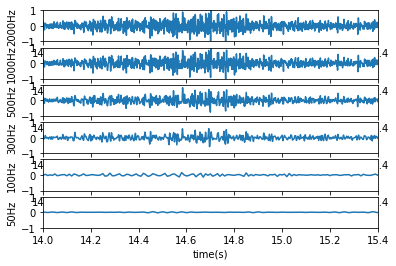

In [17]:
plt.figure()

plt.subplot(6,1,1)
plt.plot(org_taxis,org_signal)
plt.xlim(14,15.4)
plt.ylim(-1,1)
plt.ylabel( str(org_SR)+'Hz')

plt.subplot(6,1,2)
plt.plot(new_taxis1,new_signal1)
plt.xlim(14,15.4)
plt.ylim(-1,1)
plt.ylabel( str(new_SR1)+'Hz')

plt.subplot(6,1,3)
plt.plot(new_taxis2,new_signal2)
plt.xlim(14,15.4)
plt.ylim(-1,1)
plt.ylabel( str(new_SR2)+'Hz')

plt.subplot(6,1,4)
plt.plot(new_taxis3,new_signal3)
plt.xlim(14,15.4)
plt.ylim(-1,1)
plt.ylabel( str(new_SR3)+'Hz')

plt.subplot(6,1,5)
plt.plot(new_taxis4,new_signal4)
plt.xlim(14,15.4)
plt.ylim(-1,1)
plt.ylabel( str(new_SR4)+'Hz')

plt.subplot(6,1,6)
plt.plot(new_taxis5,new_signal5)
plt.xlim(14,15.4)
plt.ylim(-1,1)
plt.ylabel( str(new_SR5)+'Hz')
plt.xlabel('time(s)')


plt.show()

## Data Segment and Average

As shown in the picture below, The EEG Signal was collected when the subject lifting the right or left arm. The time stamp was stored in the stimarker.

![image-20220704111251417](https://s2.loli.net/2022/07/04/7MFJNBEGPVd9lI5.png)

* Hbdata  with size timepoints*Hb components(HbO2, Hb, Hbtotal)*channels
* taxis  records the time axis of whole series
* Stimarker  event markers, with size timepoints*numbers of event
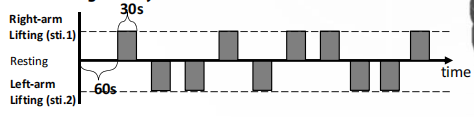

In [18]:
from cProfile import label
from tkinter import Label
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io

### Load Data
* the data signal was saved as "Hbdata" with size timepoints*Hb components(HbO2, Hb, Hbtotal)*channels
* the event markers were recorded in "stimarker" with size timepoints*numbers of event
* "taxis" records the time axis of whole series

In [20]:
#  0 for HbO2, 2 for Hb, 4 for Hb total
select_Hbcomp=0
select_channel=4

SR=10.42 # sampling rate in Hz
segment_tplength=round(50*SR) # segment in 50 s


mat_data = scipy.io.loadmat('fNIRSdata.mat')
Hbdata = mat_data['Hbdata']

stimarker = mat_data['stimarker']

signal = Hbdata[:,select_Hbcomp,select_channel]
taxis = mat_data['taxis'].flatten()

right_time = np.nonzero(stimarker[:,0] == 1)[0]
left_time = np.nonzero(stimarker[:,1] == 1)[0]

Text(0, 0.5, 'HbO2 concentration(a.u.)')

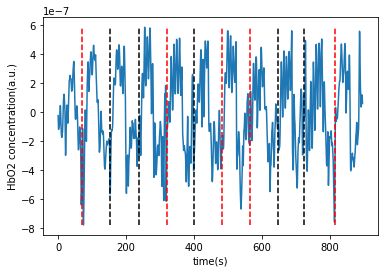

In [23]:
# plot the signal with event timepoints
plt.figure()
plt.plot(taxis, signal)
for i in range(right_time.size):
    plt.plot([taxis[right_time[i]],taxis[right_time[i]]], [np.min(signal),np.max(signal)],'r--')

for i in range(left_time.size):
    plt.plot([taxis[left_time[i]],taxis[left_time[i]]], [np.min(signal),np.max(signal)],'k--')

plt.xlabel('time(s)')
plt.ylabel('HbO2 concentration(a.u.)')


### cut signal
cut signal into segments and save as a new matrix with size    
segment length* numbers of segment

In [24]:

# cut signal into segments and save as a new matrix with size    segment length* numbers of segment
right_Hbsegment=np.zeros([segment_tplength, right_time.size])
for i in range(right_time.size):
    right_Hbsegment[:,i] = signal[right_time[i]:right_time[i]+segment_tplength]

left_Hbsegment=np.zeros([segment_tplength, left_time.size])
for i in range(left_time.size):
    left_Hbsegment[:,i] = signal[left_time[i]:left_time[i]+segment_tplength]

Text(0.5, 1.0, 'Left-arm lifting')

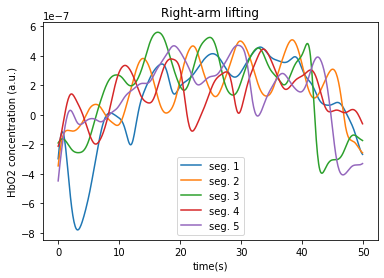

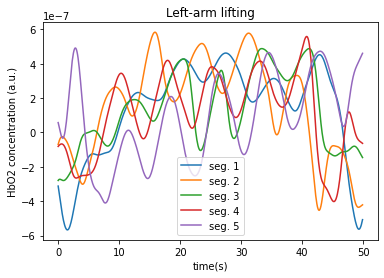

In [25]:
# plot the segment signals
plt.figure()
for i in range(right_time.size):
    plt.plot(taxis[:segment_tplength],right_Hbsegment[:,i],label='seg. '+str(i+1))
plt.legend()
plt.xlabel('time(s)')
plt.ylabel('HbO2 concentration (a.u.)')
plt.title('Right-arm lifting')


plt.figure()
for i in range(left_time.size):
    plt.plot(taxis[:segment_tplength],left_Hbsegment[:,i],label='seg. '+str(i+1))
plt.legend()
plt.xlabel('time(s)')
plt.ylabel('HbO2 concentration (a.u.)')
plt.title('Left-arm lifting')

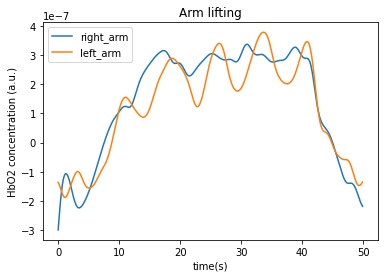

In [26]:
# plot the block average signals
right_BlockAvg=np.mean(right_Hbsegment,1)
left_BlockAvg=np.mean(left_Hbsegment,1)

plt.figure()
plt.plot(taxis[:segment_tplength],right_BlockAvg, label='right_arm')
plt.plot(taxis[:segment_tplength],left_BlockAvg, label='left_arm')
plt.legend()
plt.xlabel('time(s)')
plt.ylabel('HbO2 concentration (a.u.)')
plt.title('Arm lifting')


plt.show()
